In [ ]:
#The variable medical_charges_url is a string that stores the URL to a CSV file (medical-charges.csv) hosted on GitHub.
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
# This function allows you to download a file from the web.
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')


('medical.csv', <http.client.HTTPMessage at 0x7ce0faac0400>)

In [ ]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age**

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df, x="age", marginal='box', nbins=30, title='Distribution of Age')
#marginal='box  plotly will also create a boxplot above histogram
fig.update_layout(bargap=0.1)
fig.show()

**BMI**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box',color_discrete_sequence=['red'], title='Distribution of BMI (Body Mass Index)' )
fig.update_layout(bargap=0.1)
fig.show()

Gaussian distribution ,
<18.5 underweight, 18.5-24.9 normal, 25-29.9 overweight, < obesity,
<morbid obesity

**Charges**

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', title='Distribution of Charges', color='smoker', color_discrete_sequence=['green', 'grey'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='smoker', marginal='box', title='Distribution of Sex', color='sex', color_discrete_sequence=['pink', 'blue'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df, x='children', y='charges')

**Computing correlation **

lies between 1 to -1.

0 = no relation

1 = strong relation

-1 = strong inverse relation

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
#medical_df.charges.corr(medical_df.smoker.map({'yes':1, 'no':0}))
#'yes' (smoker) is mapped to 0
#'no' (non-smoker) is mapped to 1

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.sex

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [ ]:
sex_values = {'male':1 ,'female':0 }
medical_df.charges.corr(medical_df.sex.map(sex_values))
#the correlation is so small that it suggests there is little to no meaningful linear relationship between sex and charges.

0.057292062202025484

## computing correlation numeric colums and other colums with each other

In [ ]:
px.scatter(medical_df, x='age', y='age')

In [ ]:
#smoker_values = {'no': 0, 'yes': 1}
#smoker_numeric = medical_df.smoker.map(smoker_values)
#medical_df.charges.corr(smoker_numeric)

In [ ]:
m = medical_df.corr(numeric_only=True)
# The numeric_only parameter tells the corr() method to only include numerical columns
# in the correlation calculation, thus avoiding the error caused by string columns.

In [ ]:
#medical_df.corr(numeric_only=True)
m

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


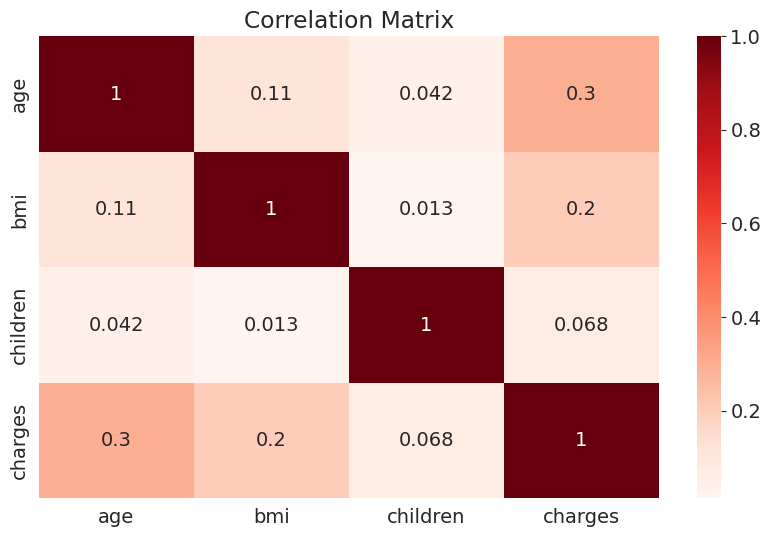

In [ ]:
sns.heatmap(m, cmap='Reds', annot=True)
plt.title('Correlation Matrix');    #seaborn

**Linear Regression using a Single Feature**

 Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers

In [ ]:
#create a data frame containing just the data for non-smokers
non_smoker_df = medical_df[medical_df.smoker == 'no']

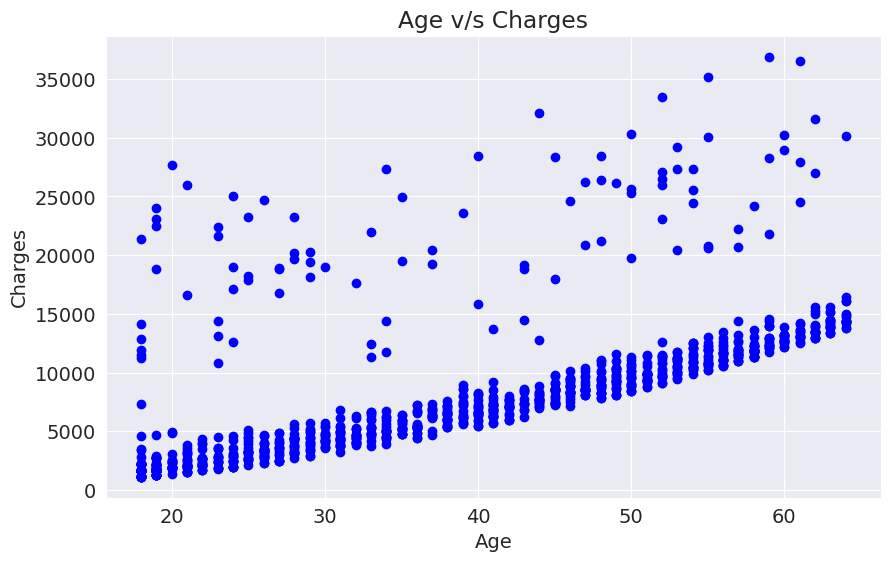

In [ ]:
#visulaize relationship  between "age" and "charges"
plt.title('Age v/s Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color='blue')


**Linear Regression Model**

charges=w×age+b

In [ ]:
def estimate_charges(age, w, b):
  return w*age+b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges(30, w,b)

1600

In [ ]:
ages = non_smoker_df.age

In [ ]:
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


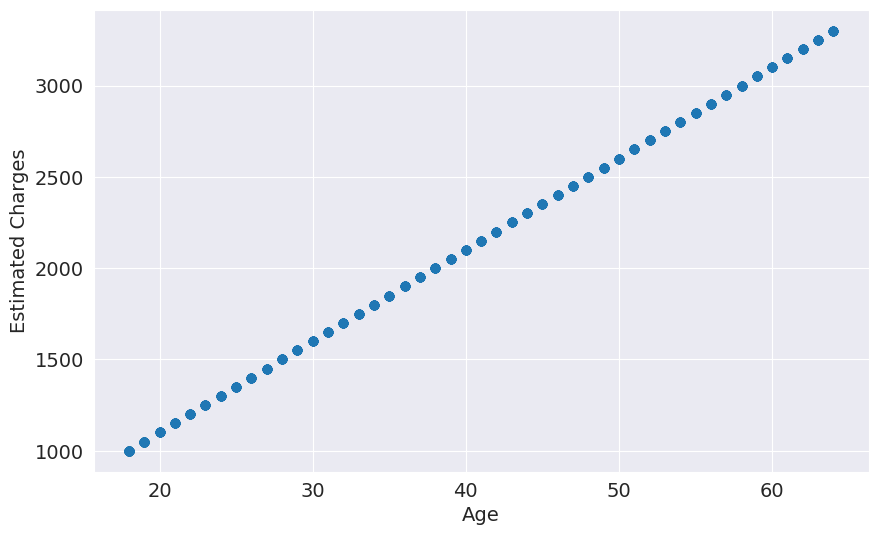

In [ ]:
plt.scatter(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges');

Text(0, 0.5, 'Estimated Charges')

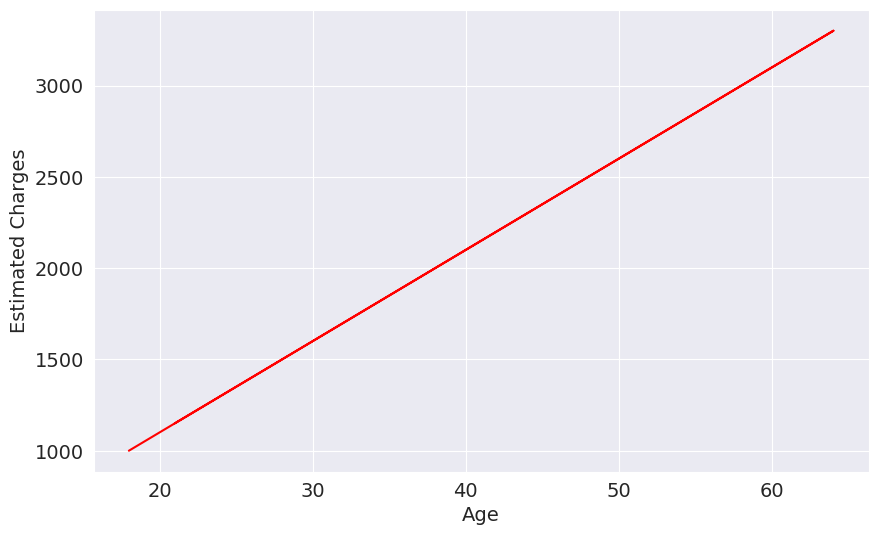

In [ ]:
 plt.plot(ages, estimated_charges, 'r-')
 plt.xlabel('Age')
 plt.ylabel('Estimated Charges')

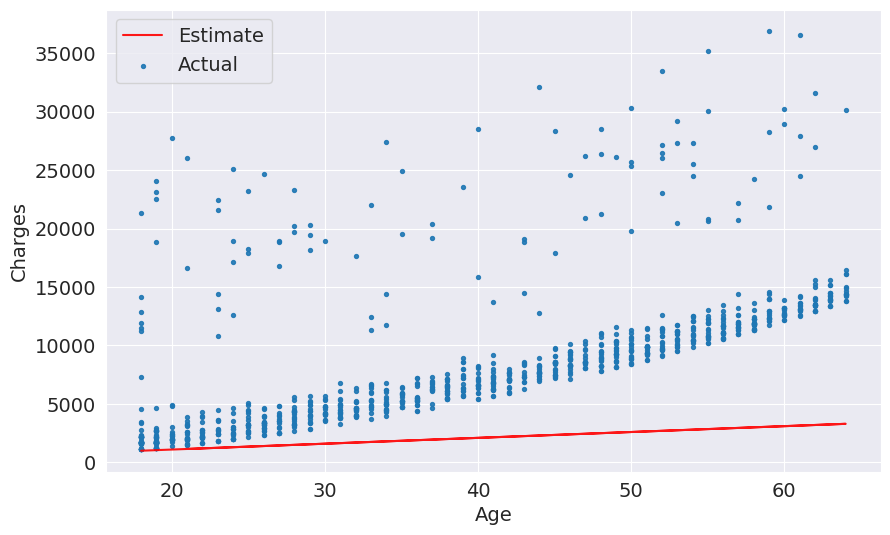

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel("Age")
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

Try_Parameters to give graph

In [ ]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.9)
    plt.xlabel("Age")
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

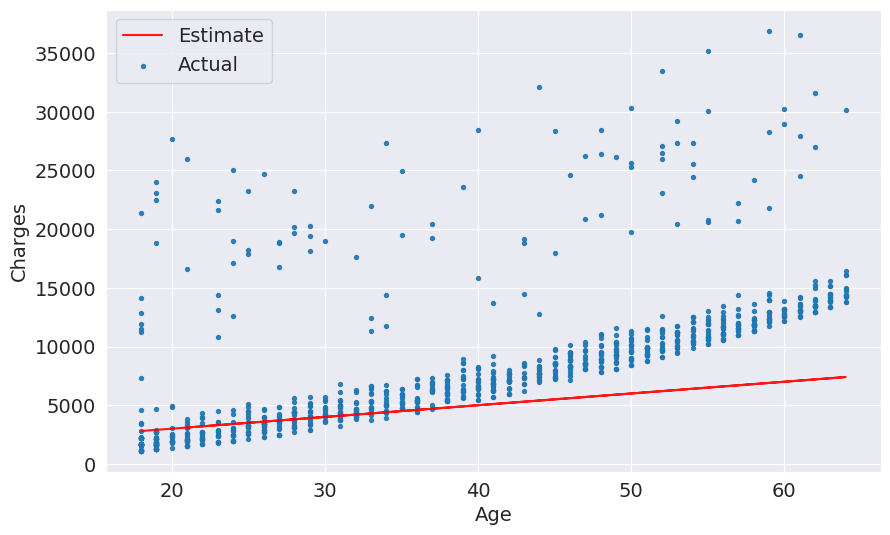

In [ ]:
try_parameters(100, 1000)

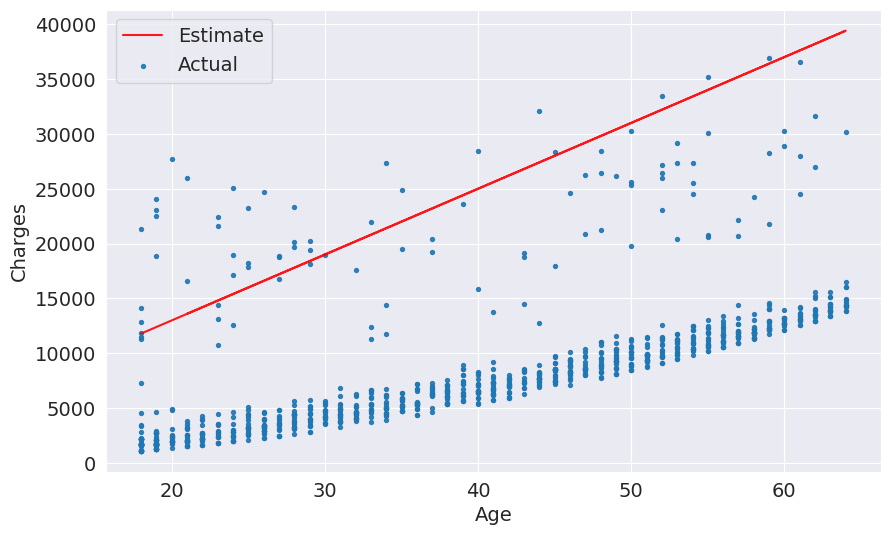

In [ ]:
try_parameters(600, 1000)   #The line moves up if we increase weight

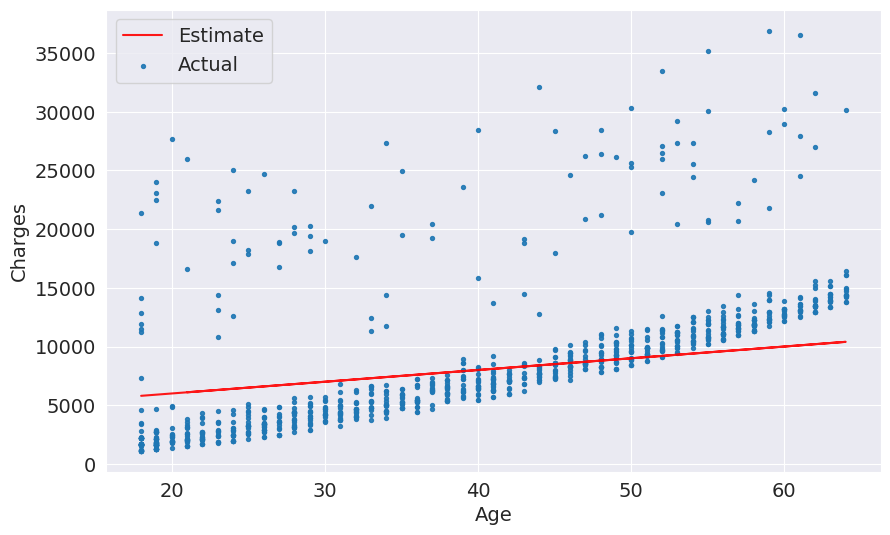

In [ ]:
try_parameters(100, 4000)

**RMSE**

To compute how unfit our model is. The result is called loss because it predicts how bad the model is at predicting values.

In [ ]:
import numpy as np

def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(target-predictions)))

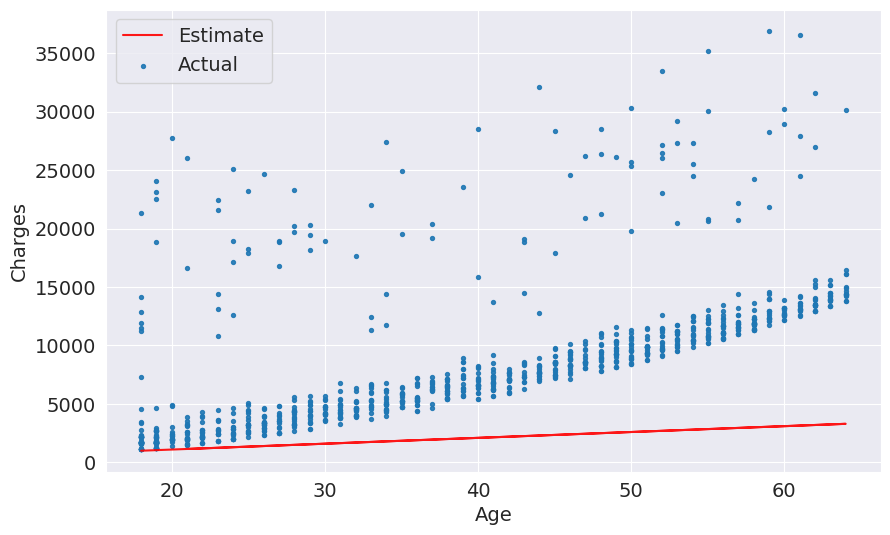

In [ ]:
w = 50
b = 100
try_parameters(w, b)

In [ ]:
#Find out how bad this predictions is.
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

This means each element in the prediction differs from the actual target by 8461Rs.

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


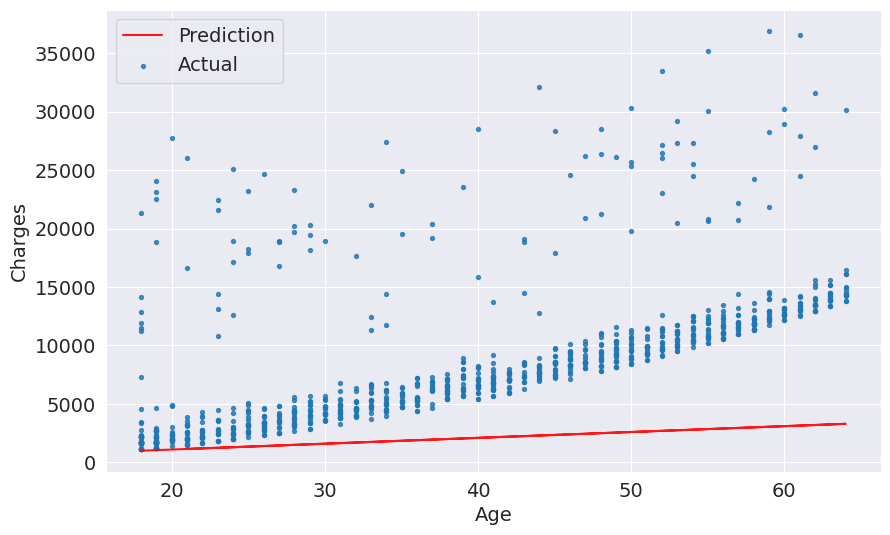

In [ ]:
try_parameters(50, 100)

RMSE Loss:  7453.509265201121


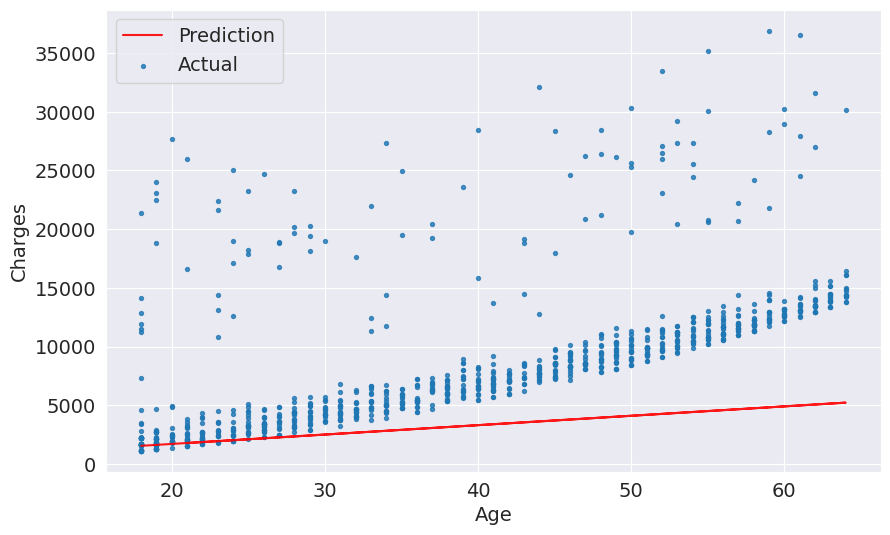

In [ ]:
try_parameters(80,100)

RMSE Loss:  5765.203974713685


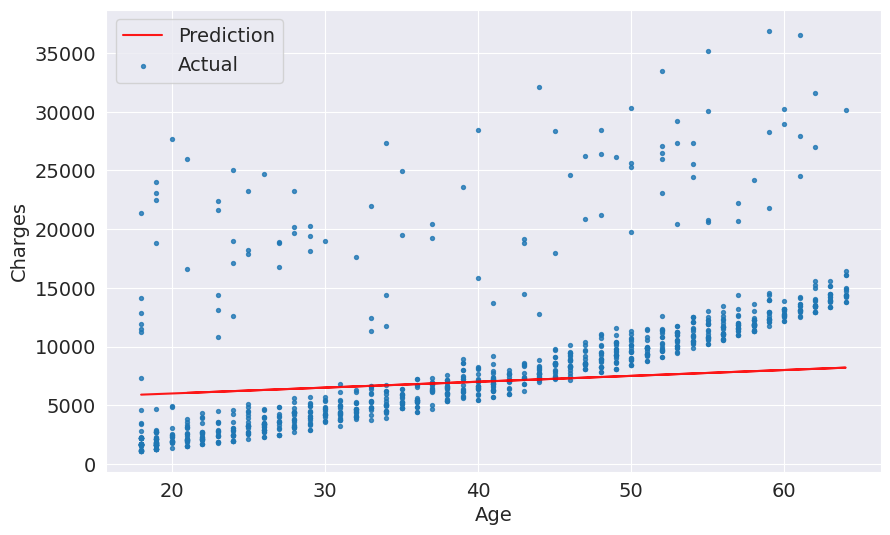

In [ ]:
try_parameters(50,5000)

RMSE Loss:  4757.980240770584


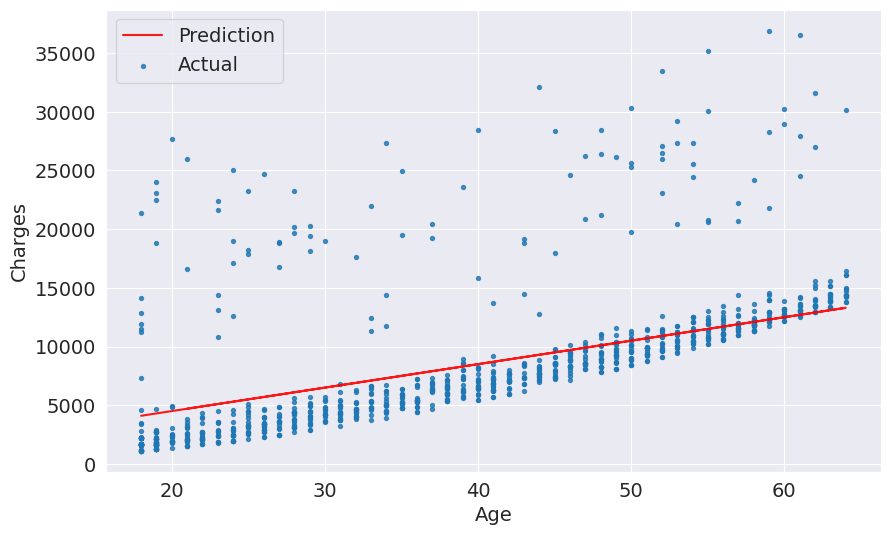

In [ ]:
try_parameters(200,500)
#The lowest loss

RMSE Loss:  4662.516524487403


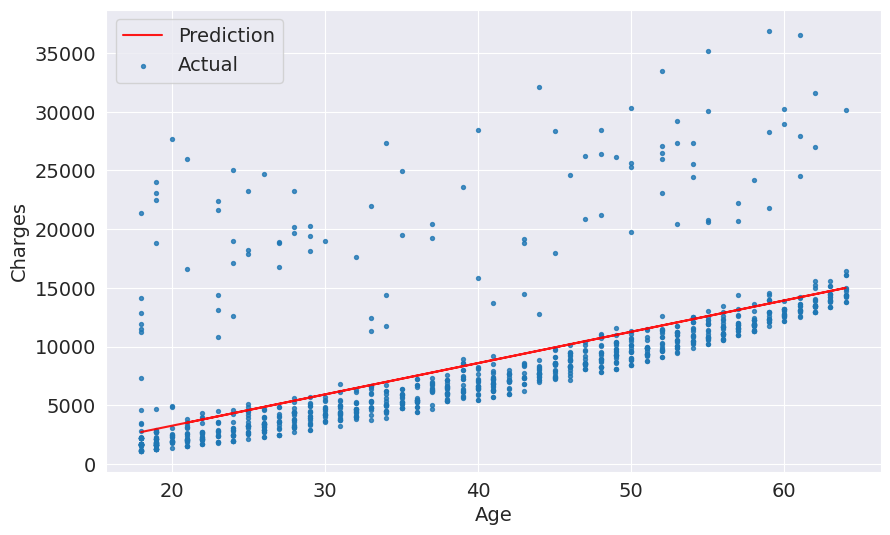

In [ ]:
try_parameters(267, -2091)

**Optimization**

 we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.



1.   Ordinary Least Squares
2.   Stochastic gradient descent

same objective: to minimize the loss.

->While ordinary least squares directly
computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.




In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

In [ ]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [ ]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]  #[['age]] because 2 parameters needed
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape : ', targets.shape)

inputs.shape : (1064, 1)
targets.shape :  (1064,)


Let's fit the model to the data.

inputs: This is the data that is fed into the model.

targets: These are the labels or the actual values you want the model to predict.

When you call model.fit(), the model adjusts its internal parameters (like weights in a neural network) based on the relationship between inputs and targets. The goal is to minimize the error between the model's predictions and the actual targets through iterative updates, using optimization techniques such as gradient descent.

In [ ]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

This method is used to make predictions on new, unseen data once a model has been trained.

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [ ]:
rmse(targets, predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

**The parameters of the model are stored in coef_ and intercept**

In [ ]:
#w
model.coef_

array([267.24891283])

In [ ]:
#b
model.intercept_

-2091.4205565650864

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss:  4662.505766636395


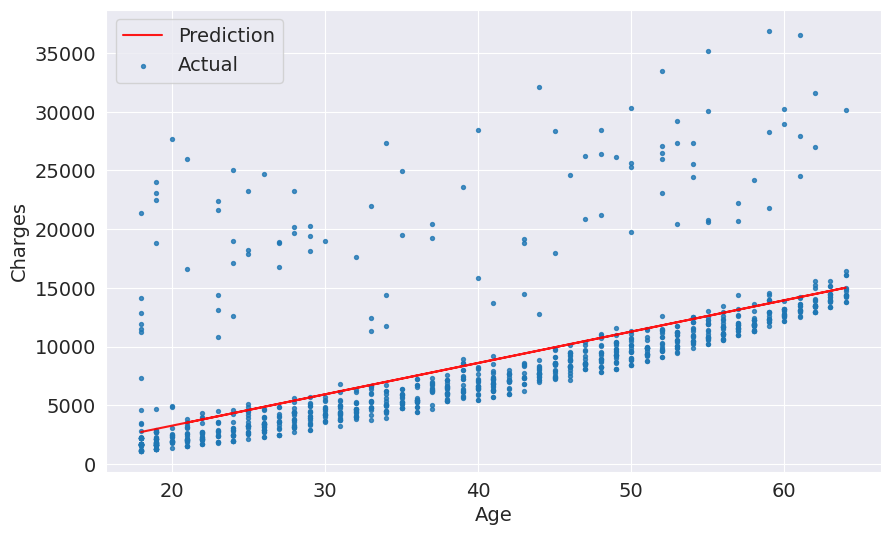

In [ ]:
try_parameters(model.coef_, model.intercept_)

**To train model for smokers**

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

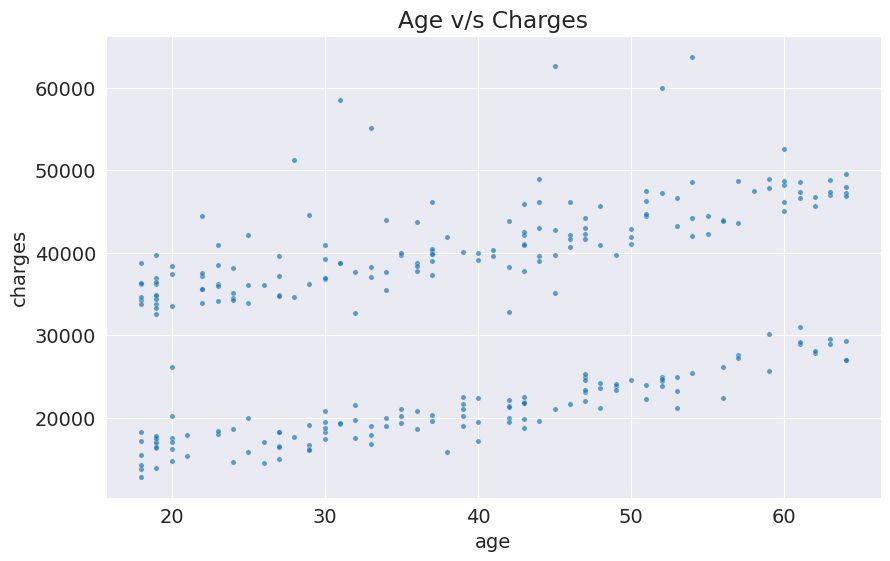

In [ ]:
#Visulaizing relationship between "age" and "charges"
plt.title('Age v/s Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
w = 50
b = 100
ages2 = smoker_df.age
estimated_charges2 = estimate_charges(ages2, w, b)

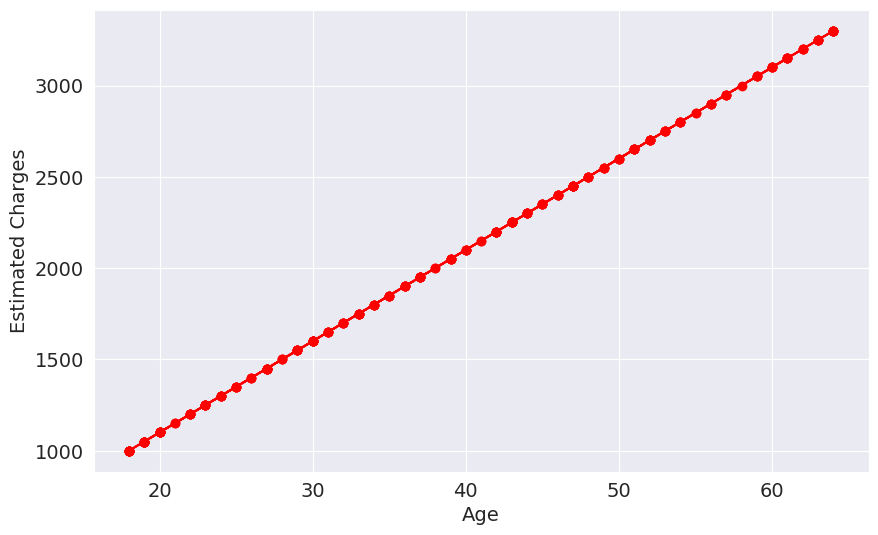

In [ ]:
plt.plot(ages2, estimated_charges2, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

Text(0, 0.5, 'Charges')

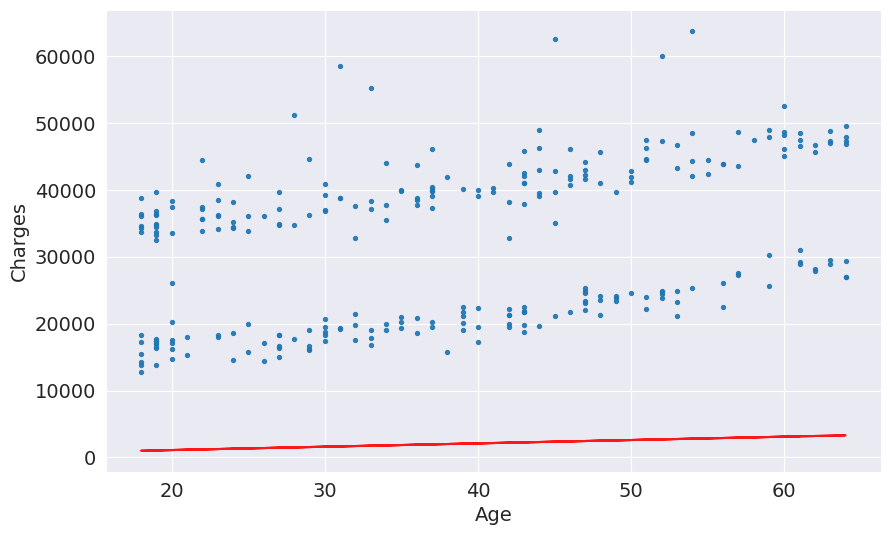

In [ ]:
target2 = smoker_df.charges

plt.plot(ages2, estimated_charges2, 'r', alpha=0.9)
plt.scatter(ages2, target2, s=8, alpha=0.9)
plt.xlabel("Age")
plt.ylabel('Charges')

In [ ]:
def try_parameters(w,b):
    ages2 = smoker_df.age
    target2 = smoker_df.charges
    estimated_charges2 = estimate_charges(ages2, w,b)
    plt.scatter(ages2, target2, s=8, alpha=0.9)
    plt.plot(ages2, estimated_charges2, 'r', alpha=0.9)
    plt.xlabel("Age")
    plt.ylabel('Charges')

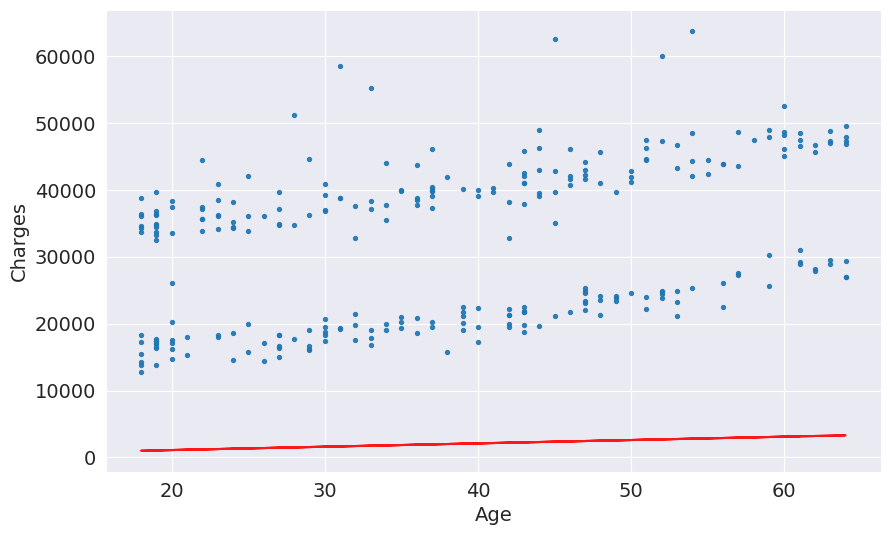

In [ ]:
try_parameters(50, 100)

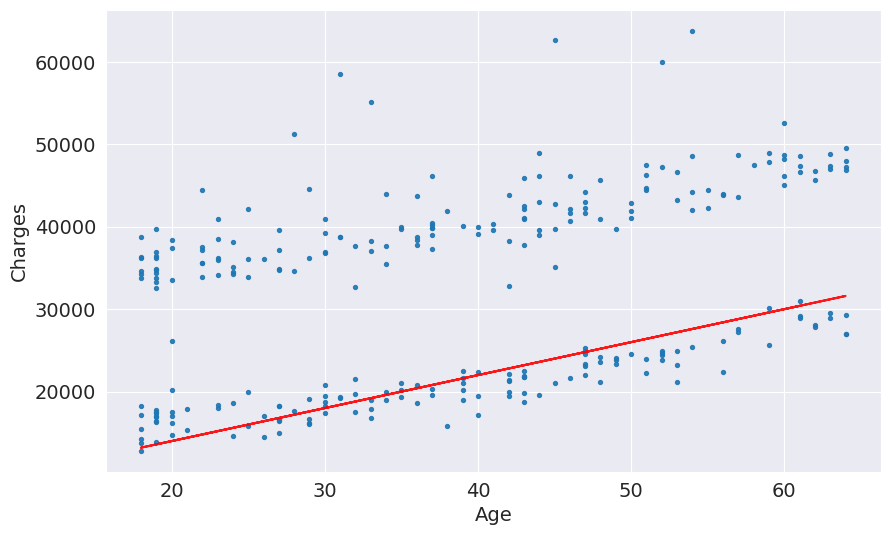

In [ ]:
try_parameters(400, 6000)

In [ ]:
def rmse(target2, predictions2):
  return np.sqrt(np.mean(np.square(target2-predictions2)))
  w=50
  b=100


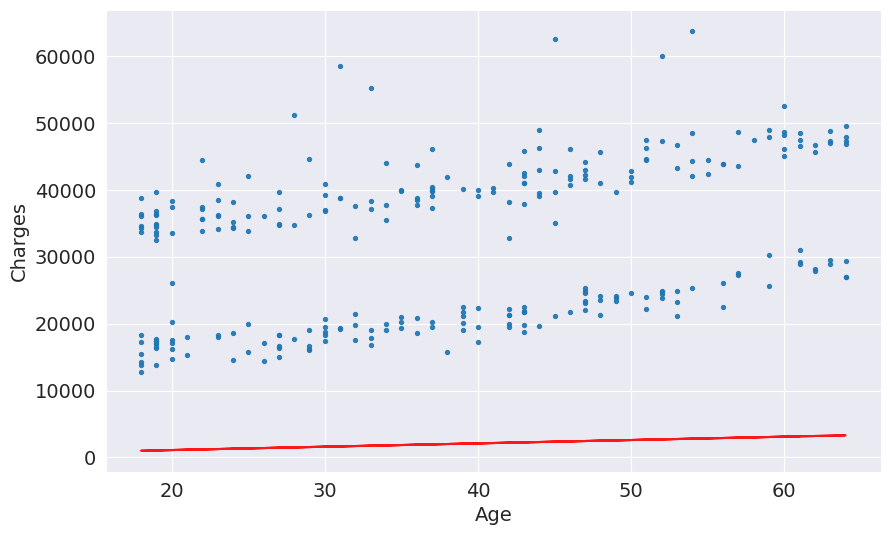

In [ ]:
try_parameters(w,b)

In [ ]:
targets2 = smoker_df.charges
predicted2 = estimate_charges(smoker_df.age, w, b)

In [ ]:
rmse(targets2, predicted2)

32074.58722734571

In [ ]:
#modifying try_parameters
def try_parameters(w, b):
  ages2 = smoker_df.age
  target2 = smoker_df.charges
  predictions2 = estimate_charges(ages2, w, b)

  plt.plot(ages2, predictions2, 'r', alpha=0.9)
  plt.scatter(ages2, target2, s=8, alpha=0.9)
  plt.xlabel("Age")
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual'])

  loss = rmse(target2, predictions2)
  print("RMSE Loss: ", loss)

RMSE Loss:  15157.939538508019


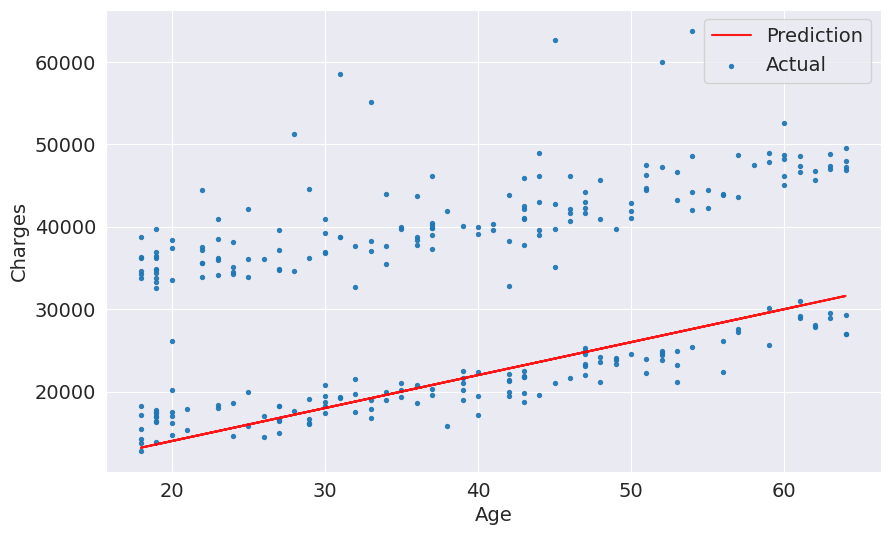

In [ ]:
try_parameters(400, 6000)

In [ ]:
model = LinearRegression()

In [ ]:
inputs2 = smoker_df[['age']]
targets2 = smoker_df.charges
print('inputs2.shape :', inputs2.shape)
print('targets2.shape : ', targets2.shape)

inputs2.shape : (274, 1)
targets2.shape :  (274,)


In [ ]:
model.fit(inputs2, targets2)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [ ]:
predictions2 = model.predict(inputs2)

In [ ]:
predictions2

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
rmse(targets2, predictions2)

10711.00334810241

In [ ]:
# w
model.coef_

array([305.23760211])

In [ ]:
# b
model.intercept_

20294.128126915966

RMSE Loss:  10711.00334810241


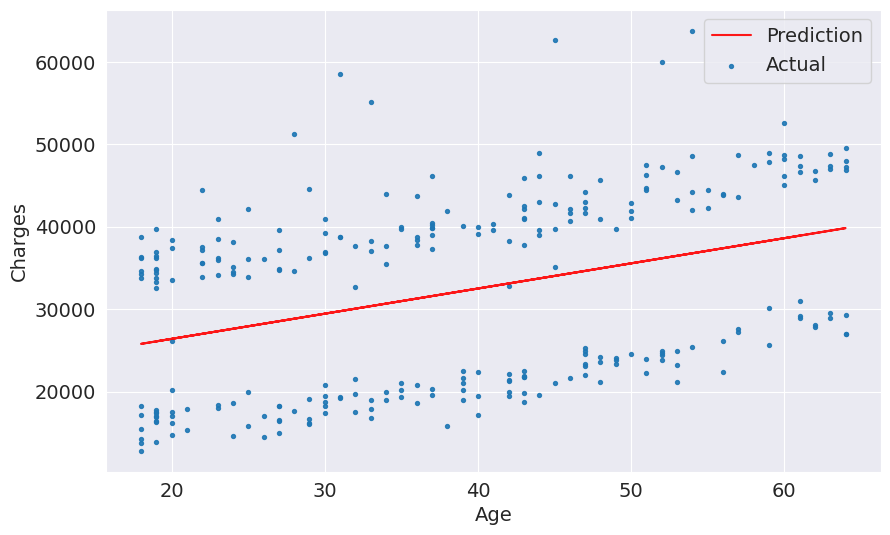

In [ ]:
try_parameters(model.coef_, model.intercept_)

**Linear Regression using Multiple Features**

charges=w1×age+w2×bmi+b

In [ ]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4662.3128354612945


In [ ]:
#As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges' , title='BMI v/s harges')
fig.update_traces(marker_size=5)    #This method allows you to update the properties of all the traces in pyplot
fig.show()

In [ ]:
#3d scatter plot for age,bmi and charges
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.6)
fig.show()

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

adding children

charges = w1 x age + w2  x bmi + charges x bmi

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [ ]:
#Strip Plot
fig = px.scatter(non_smoker_df , x='children', y='charges', title="Children v/s Charges")
fig.update_traces(marker_size=8, marker_opacity=0.7)
fig.show()

In [ ]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("loss=", loss)

loss= 4608.470405038247


for all customers

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


#ans = Loss: 11355.317901125973

Loss: 11355.317901125973


**Using Categorical Features for Machine Learning**


1.   Binary Categories
2.   One-hot Encoding
3.   Ordinals







<Axes: xlabel='smoker', ylabel='charges'>

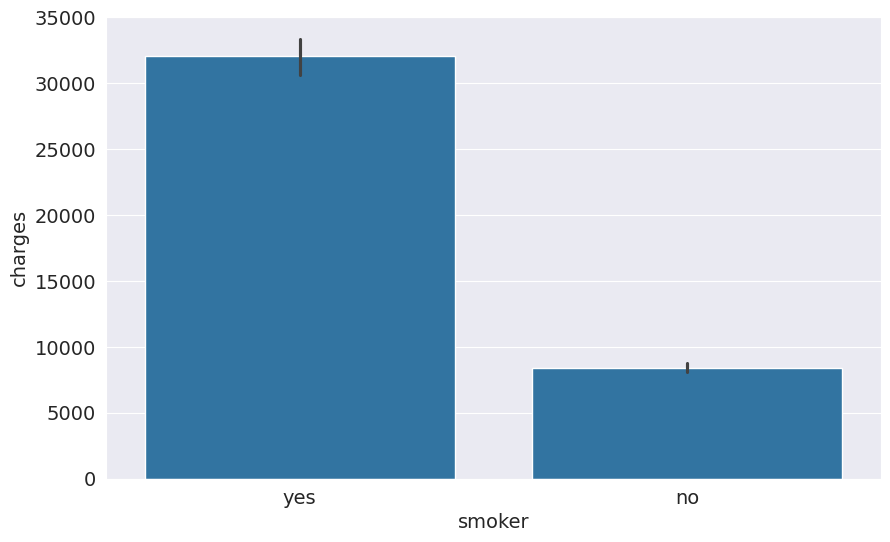

In [ ]:
#Binary Categories
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_codes={'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
#we can now use the smoker_code column for linear regression
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("Loss= ", loss)

Loss=  6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

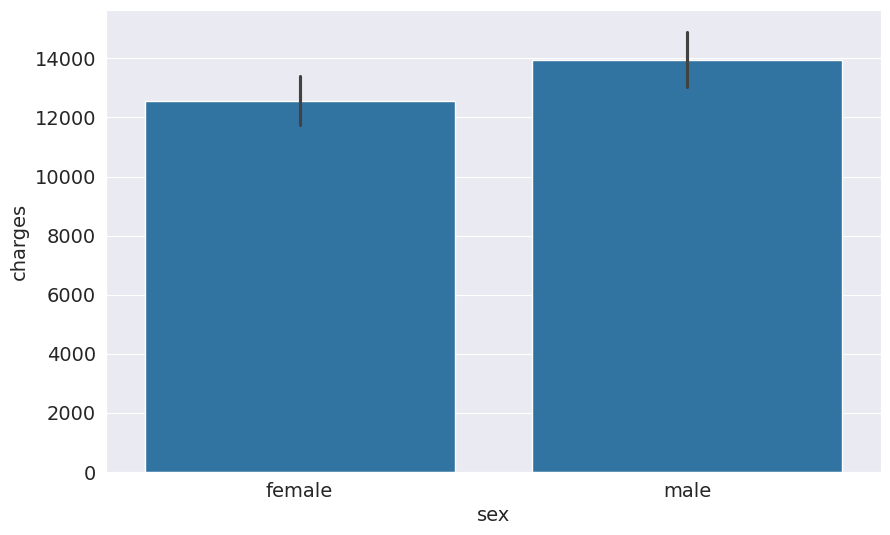

In [ ]:
# Adding sex column as well
sns.barplot(data=medical_df,x='sex', y='charges')

In [ ]:
sex_codes = {'female':0, 'male':1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

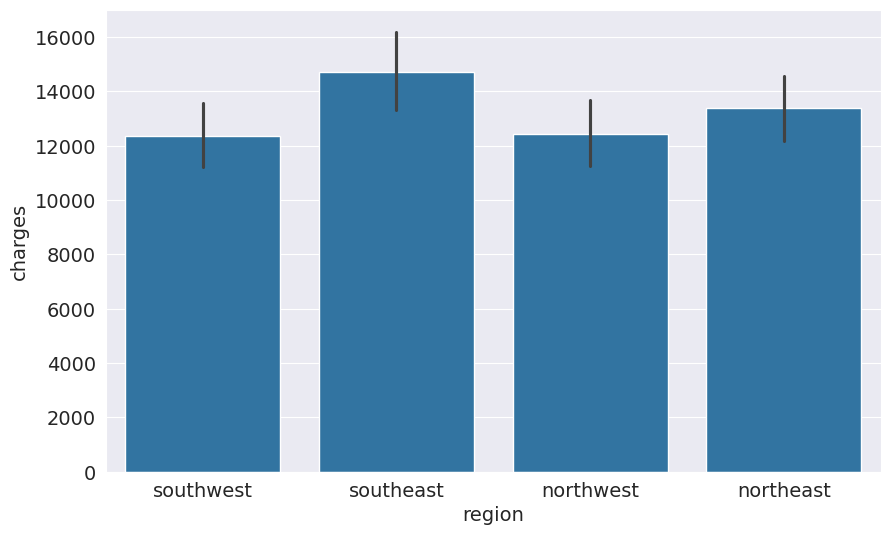

In [ ]:
#One-hot Encoding
sns.barplot(data=medical_df, x='region', y='charges')

In [ ]:
#to do encoding
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot
#The transform() method applies the one-hot encoding to the region column of the medical_df DataFrame. The double brackets [['region']] are used to select the region column as a DataFrame, which is necessary for the encoding process.
#----#
#The result of this step is a sparse or dense matrix, where each unique value in the region column is converted into a binary vector.

#.toarray():Converts the encoded result into a dense NumPy array.



array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


**Model Improvements**

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are
important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

Thus, **Standardization **

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_  #Varience

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
#data before
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
#Scaling the data
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
#combining with categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
targets = medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)  #not much difference between both loss

Loss: 6041.6796511744515


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),   #column1  , 1 is the intercept that gets append to numeric & cat columns
    'weight': np.append(model.coef_ , model.intercept_)  #column2
})
weights_df.sort_values('weight', ascending=False)  #sorting done by weight

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customer = [[28,30,2,1,0,0,1,0,0]] #28 , 30, 2 numerical
#converting num to scaler
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])

# The most imp factors:
1. Smoking
2. Age
3. BMI